In [1]:
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, describe, linregress

In [2]:
species_dict = {'1-SAT_S1' : 'Salmonella enterica', 
                '10-KPN_S9' : 'Klebsiella pneumonia',
                '2-SAT_S2' : 'Salmonella enterica',
                '4-NTS_S4' : 'Salmonella enterica',
                '5-NTS_S5' : 'Salmonella enterica',
                '7-GC_S7' : 'Neisseria gonorrhoeae'}

In [8]:
pattern = re.compile(r'kraken_uniq\/data\/(.+)_mixed_with_(\d+)%_(.+)\.krakenuniq.report.tsv')

combined_df = pd.DataFrame()
for file in glob("../../kraken_uniq/data/*.report.tsv"):
    # skip non-mixed files
    if not 'mixed_with' in file:
        continue

    
    result = pattern.search(file)
    
    # get species and mixture percent from the filename
    main_species_label = result.group(1)
    percent_contam = int(result.group(2))
    contam_species_label = result.group(3)
    

    # read file into a dataframe
    df = pd.read_csv(file, sep = '\t', header = 2)
    # rename columns
    df = df.rename(columns = {'taxName': 'observed_species', '%' : 'observed_percent_contam'})
    # strip spaces
    df['observed_species'] = df['observed_species'].str.strip()
    # filename without suffix
    df['file'] = os.path.basename(file).replace('_R1.fastq_stats_output_filt.tsv', '')
    # determine expected values
    df['expected_main_species'] = species_dict[main_species_label]
    df['expected_contam_species'] = species_dict[contam_species_label]
    df['expected_percent_contam'] = percent_contam
    # only include good hits
    df = df.loc[(df['rank'] == 'species') & (df['observed_percent_contam'] > 0.1)]
    # remove matches to expected species
    df = df.loc[df['expected_main_species'] != df['observed_species']]
    # only retain some columns
    df = df.filter(['file', 'expected_main_species', 'expected_contam_species', 'expected_percent_contam', 'observed_species', 'observed_percent_contam'])
    # append to the combined dataframe
    combined_df = combined_df.append(df,  ignore_index=True)

combined_df

file  expected_main_species  \
0    7-GC_S7_mixed_with_25%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
1    7-GC_S7_mixed_with_25%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
2    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
3    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
4    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
5    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
6    7-GC_S7_mixed_with_5%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
7    7-GC_S7_mixed_with_5%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
8    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
9    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
10   7-GC_S7_mixed_with_25%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
11   7-GC_S7_mixed_with_10%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
12   7-GC_S7_mixed_with_10%_10-KPN_S9.krakenuniq.re...  Neisseria gonorrhoeae   
13   7-GC_S7_mixed_with_10%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
14   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
15   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
16   7-GC_S7_mixed_with_1%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
17   7-GC_S7_mixed_with_1%_10-KPN_S9.krakenuniq.rep...  Neisseria gonorrhoeae   
18   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
19   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
20   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
21   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
22   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
23   4-NTS_S4_mixed_with_5%_5-NTS_S5.krakenuniq.rep...    Salmonella enterica   
24   4-NTS_S4_mixed_with_5%_5-NTS_S5.krakenuniq.rep...    Salmonella enterica   
25   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
26   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
27   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
28   4-NTS_S4_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
29   4-NTS_S4_mixed_with_5%_10-KPN_S9.krakenuniq.re...    Salmonella enterica   
..                                                 ...                    ...   
103  10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...   Klebsiella pneumonia   
104  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
105  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
106  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
107  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
108  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
109  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
110  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
111  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
112  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
113  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
114  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
115  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
116  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
117  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   
118  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   
119  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   
120  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   


In [9]:
# extract matching data where observed contam matches expected
# first find rows where observed matches expected
matching = combined_df.loc[combined_df['expected_contam_species'] == combined_df['observed_species']].copy()
# exclude Salmonella results
matching = matching.loc[matching['expected_main_species'] != matching['expected_contam_species']]
# add column for deviation
matching['deviation'] = matching['expected_percent_contam'] - matching['observed_percent_contam']
matching['deviation_percent'] = (matching['expected_percent_contam'] - matching['observed_percent_contam'])/matching['expected_percent_contam']*100

matching

file  expected_main_species  \
2    7-GC_S7_mixed_with_25%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
5    7-GC_S7_mixed_with_5%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
9    7-GC_S7_mixed_with_5%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
10   7-GC_S7_mixed_with_25%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
11   7-GC_S7_mixed_with_10%_4-NTS_S4.krakenuniq.rep...  Neisseria gonorrhoeae   
13   7-GC_S7_mixed_with_10%_1-SAT_S1.krakenuniq.rep...  Neisseria gonorrhoeae   
15   7-GC_S7_mixed_with_1%_4-NTS_S4.krakenuniq.repo...  Neisseria gonorrhoeae   
19   7-GC_S7_mixed_with_1%_1-SAT_S1.krakenuniq.repo...  Neisseria gonorrhoeae   
22   4-NTS_S4_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
27   4-NTS_S4_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
42   4-NTS_S4_mixed_with_10%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
55   4-NTS_S4_mixed_with_1%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
61   10-KPN_S9_mixed_with_5%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
65   10-KPN_S9_mixed_with_5%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
71   10-KPN_S9_mixed_with_5%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   
78   10-KPN_S9_mixed_with_25%_7-GC_S7.krakenuniq.re...   Klebsiella pneumonia   
80   10-KPN_S9_mixed_with_25%_4-NTS_S4.krakenuniq.r...   Klebsiella pneumonia   
87   10-KPN_S9_mixed_with_10%_7-GC_S7.krakenuniq.re...   Klebsiella pneumonia   
90   10-KPN_S9_mixed_with_25%_1-SAT_S1.krakenuniq.r...   Klebsiella pneumonia   
94   10-KPN_S9_mixed_with_10%_4-NTS_S4.krakenuniq.r...   Klebsiella pneumonia   
100  10-KPN_S9_mixed_with_10%_1-SAT_S1.krakenuniq.r...   Klebsiella pneumonia   
109  10-KPN_S9_mixed_with_1%_7-GC_S7.krakenuniq.rep...   Klebsiella pneumonia   
113  10-KPN_S9_mixed_with_1%_4-NTS_S4.krakenuniq.re...   Klebsiella pneumonia   
119  10-KPN_S9_mixed_with_1%_1-SAT_S1.krakenuniq.re...   Klebsiella pneumonia   
123  1-SAT_S1_mixed_with_5%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   
125  1-SAT_S1_mixed_with_25%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
129  1-SAT_S1_mixed_with_10%_7-GC_S7.krakenuniq.rep...    Salmonella enterica   
131  1-SAT_S1_mixed_with_1%_7-GC_S7.krakenuniq.repo...    Salmonella enterica   

    expected_contam_species  expected_percent_contam       observed_species  \
2       Salmonella enterica                       25    Salmonella enterica   
5       Salmonella enterica                        5    Salmonella enterica   
9       Salmonella enterica                        5    Salmonella enterica   
10      Salmonella enterica                       25    Salmonella enterica   
11      Salmonella enterica                       10    Salmonella enterica   
13      Salmonella enterica                       10    Salmonella enterica   
15      Salmonella enterica                        1    Salmonella enterica   
19      Salmonella enterica                        1    Salmonella enterica   
22    Neisseria gonorrhoeae                        5  Neisseria gonorrhoeae   
27    Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
42    Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
55    Neisseria gonorrhoeae                        1  Neisseria gonorrhoeae   
61    Neisseria gonorrhoeae                        5  Neisseria gonorrhoeae   
65      Salmonella enterica                        5    Salmonella enterica   
71      Salmonella enterica                        5    Salmonella enterica   
78    Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
80      Salmonella enterica                       25    Salmonella enterica   
87    Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
90      Salmonella enterica                       25    Salmonella enterica   
94      Salmonella enterica                       10    Salmonella enterica   
100     Salmonella enterica              

/Users/au3/.pyenv/versions/3.7.0/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.9991900770169153

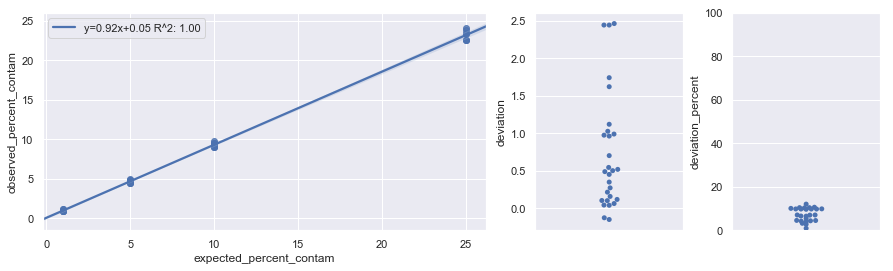

In [26]:
# plot matching data

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(matching['expected_percent_contam'], matching['observed_percent_contam'])

sns.set()
f, axes = plt.subplots(1,3, figsize = [15,4], gridspec_kw  = { 'width_ratios' : [3,1,1]})
ax = sns.regplot(x="expected_percent_contam", y="observed_percent_contam", data=matching, ax=axes[0], line_kws={'label':"y={0:.2f}x+{1:.2f} R^2: {2:.2f}".format(slope,intercept, r_value)})
ax.legend()
sns.swarmplot(y="deviation", data=matching, ax=axes[1])
ax = sns.swarmplot(y="deviation_percent", data=matching, ax=axes[2])
ax.set(ylim=(0, 100))
r_value

In [11]:
ttest_rel(matching['expected_percent_contam'], matching['observed_percent_contam'])

Ttest_relResult(statistic=4.911905386981408, pvalue=3.859184512408469e-05)

In [12]:
describe(matching['deviation'])

DescribeResult(nobs=28, minmax=(-0.14700000000000002, 2.460000000000001), mean=0.7215499999999999, variance=0.6042141722222227, skewness=1.122065674642097, kurtosis=0.22921151329076928)